# Unit 5 - Financial Planning

In [40]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

""" to ignore warning messages"""
import warnings
warnings.filterwarnings("ignore")

In [41]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [42]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [43]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [44]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()

import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()

import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19021606,
            "total_supply": 19021606,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 38533.0,
                    "volume_24h": 21544742194,
                    "market_cap": 733066874443,
                    "percentage_change_1h": 0.0421287710715902,
                    "percentage_change_24h": -3.17505494413636,
                    "percentage_change_7d": -3.03460984007271,
                    "percent_change_1h": 0.0421287710715902,
                    "percent_change_24h": -3.17505494413636,
                    "percent_change_7d": -3.03460984007271
                },
                "CAD": {
                    "price": 49083.3354,
                    "volume_24h": 27443692606.7172,
                 

In [79]:
# Fetch current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_value

# Fetch current ETH price
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $46239.60
The current value of your 5.3 ETH is $14919.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [46]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [47]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [48]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key, 
    api_version = "v2"
)

In [49]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
# start_date = pd.Timestamp("2022-04-16", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2022-04-16", tz="America/New_York").isoformat()

# Get current closing prices for SPY and AGG
df_ticker = alpaca_api.get_bars(
    ticker, 
    timeframe, 
    start=today, 
    end=today  
).df

# Drop the time component of the date
df_ticker.index = df_ticker.index.date

df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2021-04-16,114.56,114.665,114.50,114.54,3463033,14586,114.593889,AGG
2021-04-16,417.29,417.910,415.73,417.26,77597397,368052,416.927504,SPY


In [50]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
df_ticker.head()

AGG                                                           \
              open     high    low   close   volume trade_count        vwap   
2021-04-16  114.56  114.665  114.5  114.54  3463033       14586  114.593889   

               SPY                                                            
              open    high     low   close    volume trade_count        vwap  
2021-04-16  417.29  417.91  415.73  417.26  77597397      368052  416.927504

In [51]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.54
Current SPY closing price: $417.26


In [52]:
# Compute the current value of shares
"""Current value = amount of shares * closing price of share"""
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20863.00
The current value of your 200 AGG shares is $22908.00


### Savings Health Analysis

In [53]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]}

In [54]:
# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,61158.888
shares,43771.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

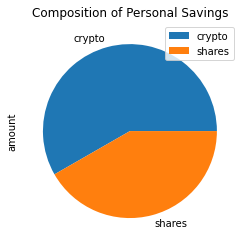

In [55]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [56]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [57]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-20', tz='America/New_York').isoformat()

In [58]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

df_stock_data = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
).df

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date

# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2016-04-20  111.02  111.03  110.6040  110.66  2376076       11319  110.798771   
2016-04-21  110.52  110.62  110.4500  110.51  2692797       10838  110.521580   
2016-04-22  110.65  110.72  110.5200  110.52  3795615       12445  110.626670   
2016-04-25  110.52  110.59  110.3900  110.40  3118795       12058  110.495702   
2016-04-26  110.48  110.48  110.2259  110.35  2323308       11955  110.332447   

               SPY                                                            
              open    high     low   close    volume trade_count        vwap  
2016-04-20  209.90  210.92  209.39  210.07  81015514      266771  210.152074  
2016-04-21  210.13  210.25  208.65  208.90  85473874      294905  209.439796  
2016-04-22  208.53  209.29  207.91  208.96  99051724      299063  208.726150  
2016-04-25  208.28  208.66  207.54  208.59  66166494      249181  208.181350  
2016-04-26  209.02  209.52  208.36  209.00  74756174      240405  208.845012

In [59]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*30
)

In [60]:
# Printing the simulation input data

MC_even_dist.portfolio_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2016-04-20  111.02  111.03  110.6040  110.66  2376076       11319  110.798771   
2016-04-21  110.52  110.62  110.4500  110.51  2692797       10838  110.521580   
2016-04-22  110.65  110.72  110.5200  110.52  3795615       12445  110.626670   
2016-04-25  110.52  110.59  110.3900  110.40  3118795       12058  110.495702   
2016-04-26  110.48  110.48  110.2259  110.35  2323308       11955  110.332447   

                            SPY                                                \
           daily_return    open    high     low   close    volume trade_count   
2016-04-20          NaN  209.90  210.92  209.39  210.07  81015514      266771   
2016-04-21    -0.001356  210.13  210.25  208.65  208.90  85473874      294905   
2016-04-22     0.000090  208.53  209.29  207.91  208.96  99051724      299063   
2016-04-25    -0.001086  208.28  208.66  207.54  208.59  66166494      249181   
2016-04-26    -0.000453  209.02  209.52  208.36  209.00  74756174      240405   

                                     
                  vwap daily_return  
2016-04-20  210.152074          NaN  
2016-04-21  209.439796    -0.005570  
2016-04-22  208.726150     0.000287  
2016-04-25  208.181350    -0.001771  
2016-04-26  208.845012     0.001966

In [61]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992916,1.002737,0.995718,0.987075,1.005994,1.004971,1.000817,1.002768,1.005243,1.010559,...,1.006438,1.002718,1.007532,1.008570,1.000606,0.998657,1.002309,0.991708,1.010030,0.993417
2,0.994067,1.014802,1.005634,0.983920,0.999170,1.015787,1.009124,0.991418,1.002863,1.012089,...,1.004548,1.003855,0.998255,1.006778,1.001274,0.997397,1.006186,0.981947,1.009777,0.996105
3,0.990141,1.030545,1.002744,0.981799,1.002633,1.014490,1.007817,0.992989,0.999701,1.013969,...,1.005056,1.001588,0.992815,1.009176,1.007594,0.995862,1.009508,0.990381,1.001823,1.011612
4,0.988257,1.027135,1.000199,0.979550,1.013972,1.006328,1.010134,0.986715,1.009070,1.014659,...,1.011517,1.011088,1.012070,1.003735,1.002807,0.990762,1.010866,0.987777,1.009427,1.025776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.603376,6.564073,16.718175,10.114644,14.829260,26.075297,15.680452,19.751388,5.905372,25.885608,...,15.414741,5.366084,38.560773,7.442197,14.852177,17.473926,23.915959,17.311983,29.422137,4.871558
7557,31.677475,6.573225,16.954086,10.170280,14.965297,25.961543,15.799750,19.617166,5.947634,25.979320,...,15.489882,5.425321,38.990391,7.428876,14.783993,17.548013,23.927618,17.334234,29.279134,4.855221
7558,31.992520,6.647282,16.891161,10.220831,14.961499,25.952793,15.864233,19.660790,5.981032,25.659455,...,15.451847,5.428520,39.209960,7.408193,14.664219,17.520165,23.792571,17.203620,29.591638,4.881548
7559,31.848414,6.691953,16.908295,10.310616,14.973096,26.091350,15.987664,19.550102,5.972261,25.738899,...,15.442814,5.421646,39.239907,7.484715,14.610670,17.566458,23.773921,17.091190,29.493806,4.878318


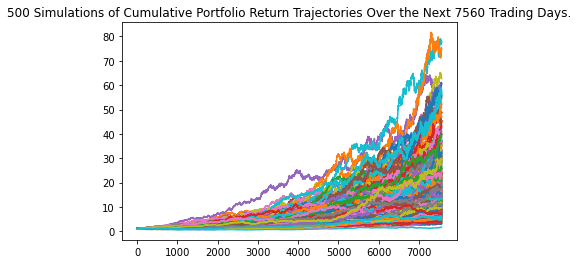

In [62]:
# Plot simulation outcomes

line_plot = MC_even_dist.plot_simulation()

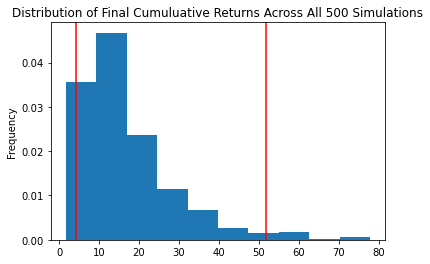

In [63]:
# Plot probability distribution and confidence intervals

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             17.161313
std              11.879605
min               1.674267
25%               8.872659
50%              13.629043
75%              21.967693
max              77.836827
95% CI Lower      4.299012
95% CI Upper     51.743704
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [65]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85980.24 and $1034874.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [66]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $128970.36 and $1552311.13


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [67]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2016-04-20  111.02  111.03  110.6040  110.66  2376076       11319  110.798771   
2016-04-21  110.52  110.62  110.4500  110.51  2692797       10838  110.521580   
2016-04-22  110.65  110.72  110.5200  110.52  3795615       12445  110.626670   
2016-04-25  110.52  110.59  110.3900  110.40  3118795       12058  110.495702   
2016-04-26  110.48  110.48  110.2259  110.35  2323308       11955  110.332447   

                            SPY                                                \
           daily_return    open    high     low   close    volume trade_count   
2016-04-20          NaN  209.90  210.92  209.39  210.07  81015514      266771   
2016-04-21    -0.001356  210.13  210.25  208.65  208.90  85473874      294905   
2016-04-22     0.000090  208.53  209.29  207.91  208.96  99051724      299063   
2016-04-25    -0.001086  208.28  208.66  207.54  208.59  66166494      249181   
2016-04-26    -0.000453  209.02  209.52  208.36  209.00  74756174      240405   

                                     
                  vwap daily_return  
2016-04-20  210.152074          NaN  
2016-04-21  209.439796    -0.005570  
2016-04-22  208.726150     0.000287  
2016-04-25  208.181350    -0.001771  
2016-04-26  208.845012     0.001966

In [68]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991688,1.003805,1.003019,1.003254,1.008149,1.000357,0.986666,1.000417,0.987970,0.994079,...,0.988100,0.997961,0.998445,1.007482,1.000728,1.013113,0.988594,1.001487,1.001999,1.000848
2,0.986841,1.022509,1.004847,1.010456,1.015092,1.005572,0.977444,1.001842,0.988159,0.995913,...,0.990437,0.993380,0.993979,1.006756,1.014067,1.012497,0.986803,0.991651,1.009047,0.998290
3,0.984809,1.022119,1.013438,1.008618,1.022162,1.005970,0.986074,0.989324,0.989038,0.996226,...,0.987672,0.990633,0.990854,1.014247,1.019636,1.026952,0.986495,0.981359,1.019744,0.996753
4,0.978493,1.033137,1.017501,1.005110,1.026997,1.009225,0.987292,0.987222,0.987995,0.998903,...,0.989883,0.999402,0.986904,1.019323,1.014799,1.039364,0.979906,0.982813,1.038508,1.007808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.258982,1.434840,1.355306,2.193579,1.872748,1.752079,1.261528,1.085965,1.120808,1.577235,...,1.577616,1.761587,1.158931,1.380483,1.893296,1.434968,1.141341,1.866600,1.311942,1.459465
1257,1.264897,1.426386,1.366851,2.222241,1.872548,1.754276,1.259672,1.087607,1.118689,1.587218,...,1.579070,1.773645,1.160064,1.389059,1.895761,1.445413,1.132861,1.874155,1.312098,1.460813
1258,1.262080,1.443967,1.367221,2.211713,1.872982,1.759717,1.261167,1.086080,1.118800,1.581603,...,1.565927,1.786318,1.153008,1.377487,1.877327,1.441217,1.144017,1.881173,1.307767,1.448816
1259,1.280136,1.430222,1.368689,2.217189,1.856461,1.748917,1.252307,1.087269,1.115427,1.599197,...,1.562434,1.780008,1.142990,1.381544,1.883995,1.454088,1.148352,1.900166,1.319625,1.451884


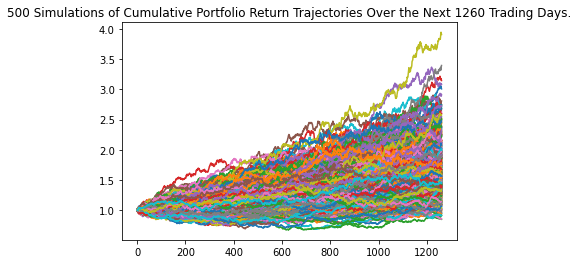

In [69]:
# Plot simulation outcomes

line_plot_five = MC_even_dist_five.plot_simulation()

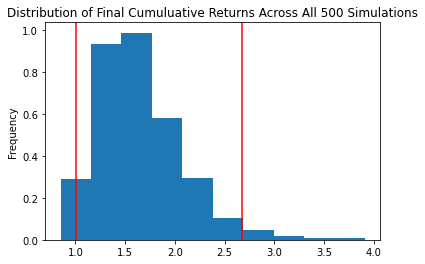

In [70]:
# Plot probability distribution and confidence intervals

dist_plot_five = MC_even_dist_five.plot_distribution()

In [71]:
# Fetch summary statistics from the Monte Carlo simulation results

even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics

print(even_tbl_five)

count           500.000000
mean              1.641620
std               0.422289
min               0.849849
25%               1.349055
50%               1.582499
75%               1.873280
max               3.908368
95% CI Lower      1.008878
95% CI Upper      2.676317
Name: 1260, dtype: float64


In [72]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $60532.71 and $160579.02


### Ten Years Retirement Option

In [73]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2016-04-20  111.02  111.03  110.6040  110.66  2376076       11319  110.798771   
2016-04-21  110.52  110.62  110.4500  110.51  2692797       10838  110.521580   
2016-04-22  110.65  110.72  110.5200  110.52  3795615       12445  110.626670   
2016-04-25  110.52  110.59  110.3900  110.40  3118795       12058  110.495702   
2016-04-26  110.48  110.48  110.2259  110.35  2323308       11955  110.332447   

                            SPY                                                \
           daily_return    open    high     low   close    volume trade_count   
2016-04-20          NaN  209.90  210.92  209.39  210.07  81015514      266771   
2016-04-21    -0.001356  210.13  210.25  208.65  208.90  85473874      294905   
2016-04-22     0.000090  208.53  209.29  207.91  208.96  99051724      299063   
2016-04-25    -0.001086  208.28  208.66  207.54  208.59  66166494      249181   
2016-04-26    -0.000453  209.02  209.52  208.36  209.00  74756174      240405   

                                     
                  vwap daily_return  
2016-04-20  210.152074          NaN  
2016-04-21  209.439796    -0.005570  
2016-04-22  208.726150     0.000287  
2016-04-25  208.181350    -0.001771  
2016-04-26  208.845012     0.001966

In [74]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008743,1.008004,1.005107,0.998126,1.009953,0.995532,1.002575,1.006959,1.000742,0.998759,...,1.002336,1.013235,1.003172,1.010476,1.000795,1.005008,1.001467,1.006970,0.998344,1.010753
2,1.001682,1.001162,1.009081,1.010130,1.012382,0.985174,1.002665,1.013827,1.001505,0.980589,...,1.010495,1.015148,1.009836,1.019183,1.006014,1.007747,1.002376,1.015897,0.996254,1.012417
3,0.992561,0.999602,1.009251,1.020775,1.018225,0.985689,1.001588,1.005258,1.008969,0.988253,...,1.007934,1.013253,1.012542,1.013812,1.016043,1.006427,1.002580,1.014199,0.989970,1.019450
4,0.992751,0.997317,1.004830,1.028500,1.020440,0.991026,0.999310,1.009231,1.013388,0.987298,...,1.002067,1.010205,1.025557,1.016642,1.018863,1.006171,1.004882,1.009490,0.991724,1.023053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.866502,3.335284,1.647629,2.273621,2.542879,2.467219,1.998075,2.190114,3.018081,2.951653,...,1.358179,2.588921,2.067439,1.598464,3.000209,2.063634,2.254265,0.946156,1.835247,2.663822
2517,2.881940,3.344519,1.669261,2.282477,2.544779,2.458923,2.033056,2.211698,3.003113,2.931994,...,1.354924,2.588497,2.067249,1.577700,2.989571,2.069451,2.235284,0.953656,1.827427,2.684013
2518,2.879296,3.320634,1.663059,2.293577,2.551908,2.461858,2.018056,2.224821,3.019709,2.932649,...,1.350543,2.604098,2.076043,1.591662,2.997047,2.039351,2.239668,0.948893,1.831936,2.693585
2519,2.892361,3.284199,1.665440,2.281992,2.558425,2.482047,2.007700,2.216756,3.033039,2.929198,...,1.348111,2.617132,2.076257,1.588668,3.007470,2.044749,2.253427,0.950093,1.850036,2.705028


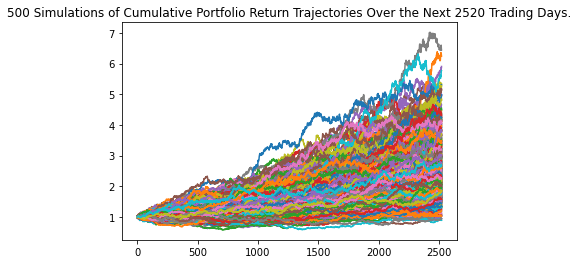

In [75]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

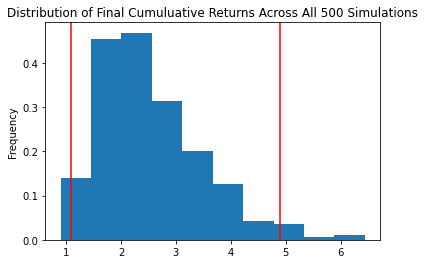

In [76]:
# Plot probability distribution and confidence intervals

dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              2.529579
std               0.945554
min               0.896784
25%               1.842527
50%               2.345901
75%               3.035206
max               6.443775
95% CI Lower      1.093761
95% CI Upper      4.888421
Name: 2520, dtype: float64


In [80]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $65625.66 and $293305.24
